![](http:/i.pinimg.com/originals/a8/9f/5f/a89f5ff47344c8329e54706767eac545.jpg)

In [6]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics.pairwise import euclidean_distances
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import preprocessing, metrics
import pandas as pd
import numpy as np

from PIL import Image
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow.keras.models import Sequential

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Input, LSTM, Dense
from tensorflow.keras.models import Model




In [7]:
df =pd.read_csv('../input/60k-responses-of-16-personalities-test-mbt/16P.csv', encoding='cp1252')

X= df.iloc[:,1 :-1].values
data =X
y = df.iloc[:, -1].values
y ,l=pd.factorize(y)


In [8]:
df.shape

(59999, 62)

In [9]:
df.head()

,Response Id,You regularly make new friends.,You spend a lot of your free time exploring various random topics that pique your interest,Seeing other people cry can easily make you feel like you want to cry too,You often make a backup plan for a backup plan.,"You usually stay calm, even under a lot of pressure","At social events, you rarely try to introduce yourself to new people and mostly talk to the ones you already know",You prefer to completely finish one project before starting another.,You are very sentimental.,You like to use organizing tools like schedules and lists.,...,You believe that pondering abstract philosophical questions is a waste of time.,"You feel more drawn to places with busy, bustling atmospheres than quiet, intimate places.",You know at first glance how someone is feeling.,You often feel overwhelmed.,You complete things methodically without skipping over any steps.,You are very intrigued by things labeled as controversial.,You would pass along a good opportunity if you thought someone else needed it more.,You struggle with deadlines.,You feel confident that things will work out for you.,Personality
0,0,0,0,0,0,0,1,1,0,0,...,0,0,0,-1,0,0,0,0,0,ENFP
1,1,0,0,-2,-3,-1,2,-2,0,3,...,0,-2,0,2,0,-1,-1,-1,3,ISFP
2,2,0,0,2,0,-1,2,0,0,1,...,0,2,0,2,-1,0,1,2,1,INFJ
3,3,0,-1,3,-1,0,0,-2,0,-2,...,0,0,-1,-1,0,1,0,-2,-1,ISTP
4,4,0,0,-1,0,2,-1,-2,0,1,...,0,1,0,2,0,1,-1,2,-1,ENFJ


In [10]:
print(df.columns)
print(df.info())
print(df.isna().sum())
print(df.describe())

Index(['Response Id', 'You regularly make new friends.',
       'You spend a lot of your free time exploring various random topics that pique your interest',
       'Seeing other people cry can easily make you feel like you want to cry too',
       'You often make a backup plan for a backup plan.',
       'You usually stay calm, even under a lot of pressure',
       'At social events, you rarely try to introduce yourself to new people and mostly talk to the ones you already know',
       'You prefer to completely finish one project before starting another.',
       'You are very sentimental.',
       'You like to use organizing tools like schedules and lists.',
       'Even a small mistake can cause you to doubt your overall abilities and knowledge.',
       'You feel comfortable just walking up to someone you find interesting and striking up a conversation.',
       'You are not too interested in discussing various interpretations and analyses of creative works.',
       'You are more

In [11]:
result = df.groupby('Personality').agg({'Personality': 'count'})
result

,Personality
Personality,
ENFJ,3743
ENFP,3760
ENTJ,3737
ENTP,3760
ESFJ,3746
ESFP,3769
ESTJ,3759
ESTP,3749
INFJ,3761


# Data Analysis
1. Correlation Coefficient
2. Euclidean Distance
3. cosine similarity
4. hamming
5. gaussian
6. blackman


# **Correlation Coefficient**
**is a statistical measure that quantifies the strength and direction of a linear relationship between two variables. It ranges between -1 and 1, where -1 indicates a perfect negative linear correlation, 1 indicates a perfect positive linear correlation, and 0 indicates no linear correlation. It helps to understand how changes in one variable are associated with changes in another variable.**

In [12]:
Correlation = df.corr()
Correlation=pd.DataFrame(np.array(Correlation))
print('Correlation')
Correlation.head()

/tmp/ipykernel_33/26867466.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Correlation = df.corr()


Correlation


,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,1.000000,0.001059,0.004834,0.012084,0.005555,0.003868,-0.001606,0.009391,-0.000709,-0.003243,...,-0.000020,0.005637,0.008918,0.001178,-0.006543,-0.000524,0.006887,0.000476,-0.006921,-0.005207
1,0.001059,1.000000,0.001872,-0.003700,0.004305,-0.002460,0.000428,-0.002956,0.000989,-0.000872,...,-0.010965,0.001737,-0.003612,-0.002004,-0.003878,-0.001628,-0.001109,0.002872,0.002963,0.001511
2,0.004834,0.001872,1.000000,0.001856,-0.003393,-0.001457,0.001447,-0.001180,0.004975,-0.003611,...,-0.003872,-0.001119,-0.000921,0.002112,-0.002113,-0.001255,-0.009923,-0.000678,-0.000958,-0.000702
3,0.012084,-0.003700,0.001856,1.000000,0.071982,0.014353,0.003865,0.042517,0.000060,0.106469,...,0.003463,-0.000861,0.048100,0.002681,0.062870,-0.004040,-0.000682,0.051303,0.060876,0.080745
4,0.005555,0.004305,-0.003393,0.071982,1.000000,-0.040502,-0.210979,-0.037477,-0.000051,-0.004150,...,-0.004243,-0.003898,0.065071,0.003745,-0.035781,0.000899,-0.008573,0.171982,-0.009186,0.014211


### We notice that the resulting values are close to zero, indicating no correlation between the features of the dataset

#  Euclidean Distance
**is a measure in geometry that calculates the straight-line distance between two points in a multi-dimensional space. It is commonly used to quantify the similarity or dissimilarity between two data points in various fields such as machine learning, statistics, and data analysis. The Euclidean distance is based on the Pythagorean theorem and considers the differences along each dimension between the points. It helps assess the proximity or separation between data points in a geometric sense.** 

In [13]:
def euclidean1(arr1,arr2):
    return np.linalg.norm(arr1-arr2)
data = np.array(data)  
distances = np.zeros((60, 60))
for i in range(60):
    for j in range(60):
        distances[i, j] =euclidean1(data[i:i+1], data[j:j+1])

distances_euclidean = pd.DataFrame(distances) 
distances_euclidean.head()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
0,0.000000,11.958261,9.695360,10.440307,10.392305,11.874342,8.831761,9.165151,11.874342,8.602325,...,10.723805,9.949874,10.583005,9.848858,11.045361,9.695360,10.583005,12.083046,11.832160,10.440307
1,11.958261,0.000000,14.317821,14.764823,14.456832,14.696938,9.219544,12.688578,16.309506,14.594520,...,12.000000,14.352700,14.594520,15.491933,13.747727,15.652476,15.905974,15.132746,15.394804,14.696938
2,9.695360,14.317821,0.000000,13.076697,13.341664,13.000000,12.328828,12.961481,13.152946,11.401754,...,13.304135,11.532563,13.416408,12.206556,12.649111,12.806248,13.784049,14.282857,14.071247,15.716234
3,10.440307,14.764823,13.076697,0.000000,12.288206,15.297059,12.369317,12.124356,15.427249,11.445523,...,13.564660,13.114877,11.704700,13.490738,14.106736,12.688578,13.747727,13.000000,15.198684,11.575837
4,10.392305,14.456832,13.341664,12.288206,0.000000,12.041595,13.341664,10.954451,15.459625,13.341664,...,14.317821,12.288206,12.569805,12.449900,12.806248,15.033296,12.409674,14.282857,16.431677,10.816654


## *When calculating the Euclidean distance, we observe that the values are large, indicating a lack of proximity or similarity between the dataset.*

# Cosine similarity
**Cosine similarity" is a measure used to determine the cosine of the angle between two non-zero vectors in a multi-dimensional space. It quantifies the similarity between these vectors by calculating the cosine of the angle formed by their representations. This measure is often employed in various fields, including natural language processing and information retrieval, to assess the likeness or resemblance between documents, text, or other data points regardless of their magnitudes. Higher cosine similarity values indicate greater similarity, while lower values indicate dissimilarity.**

In [14]:
def cosine_similarity(arr1,arr2):
    x = np.sum(np.multiply(arr1,arr2))
    y = np.linalg.norm(arr1)
    z = np.linalg.norm(arr2)
    return x / (y*z)
data = np.array(data)  
distances = np.zeros((60, 60))
for i in range(60):
    for j in range(60):
        distances[i, j] =cosine_similarity(data[i:i+1], data[j:j+1])

distances_cosine = pd.DataFrame(distances) 
distances_cosine.head()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
0,1.000000,-0.046374,-0.029424,-0.082572,0.000000,-0.119866,0.093250,0.060440,-0.095077,0.264820,...,-0.052705,-0.087706,-0.261447,0.300942,0.096309,0.136845,0.100791,-0.117363,-0.171550,0.126592
1,-0.046374,1.000000,-0.020468,-0.028719,0.037248,0.100056,0.583792,0.189191,-0.099204,-0.061404,...,0.348287,-0.020336,-0.050518,-0.043612,0.209354,-0.152305,-0.105166,0.065311,-0.008524,0.052835
2,-0.029424,-0.020468,1.000000,-0.036445,-0.047269,0.126972,-0.041158,-0.120043,0.115400,0.155844,...,-0.023262,0.141938,-0.153859,0.188170,0.170030,0.012080,-0.044486,-0.031080,-0.054083,-0.368767
3,-0.082572,-0.028719,-0.036445,1.000000,0.165809,-0.148464,0.025666,0.087336,-0.157014,0.206520,...,0.000000,-0.036210,0.179902,0.062124,0.019881,0.090397,0.020806,0.193819,-0.161889,0.303138
4,0.000000,0.037248,-0.047269,0.165809,1.000000,0.308091,-0.099867,0.279142,-0.133643,-0.047269,...,-0.084667,0.117412,0.081666,0.221579,0.212732,-0.241817,0.222631,0.047134,-0.324796,0.406726


#### **When calculating the Cosine similarity, we observe that the values are close to zero, indicating a lack of correlation or similarity between the features of the dataset**

# hamming 
**The Hamming Distance" is a metric used to measure the difference between two strings of equal length. It counts the number of positions at which the corresponding characters are different. This distance is particularly relevant when dealing with data that has a fixed length and consists of discrete elements, such as binary strings or categorical variables. The smaller the Hamming distance, the more similar the strings are; conversely, a larger distance indicates greater dissimilarity.**

In [15]:
def hamming(arr1, arr2):
    hamm = 0
    for i in range(arr1.shape[0]):
        x = bin(arr1[i] ^ arr2[i]).count('1')
        hamm += x
    return hamm
data = np.array(data)  
distances = np.zeros((60, 60))
for i in range(60):
    for j in range(60):
        distances[i, j] = hamming(data[i], data[j])

distances_hamming = pd.DataFrame(distances)
print('hamming')
distances_hamming.head()


hamming


,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
0,0.0,46.0,38.0,37.0,43.0,45.0,35.0,35.0,40.0,36.0,...,36.0,38.0,34.0,40.0,47.0,39.0,37.0,44.0,41.0,42.0
1,46.0,0.0,47.0,48.0,49.0,50.0,35.0,45.0,51.0,51.0,...,40.0,41.0,44.0,55.0,48.0,48.0,54.0,51.0,42.0,46.0
2,38.0,47.0,0.0,50.0,46.0,48.0,35.0,42.0,48.0,41.0,...,45.0,42.0,41.0,45.0,46.0,48.0,47.0,48.0,45.0,41.0
3,37.0,48.0,50.0,0.0,42.0,52.0,45.0,37.0,54.0,45.0,...,44.0,44.0,43.0,45.0,52.0,40.0,53.0,48.0,45.0,44.0
4,43.0,49.0,46.0,42.0,0.0,38.0,43.0,43.0,48.0,46.0,...,46.0,40.0,41.0,48.0,48.0,47.0,49.0,42.0,51.0,41.0


/tmp/ipykernel_33/2605489565.py:5: RuntimeWarning: invalid value encountered in double_scalars
  gaussian_value = np.exp(- (norm_diff ** 2) / (2 * sigma ** 2))


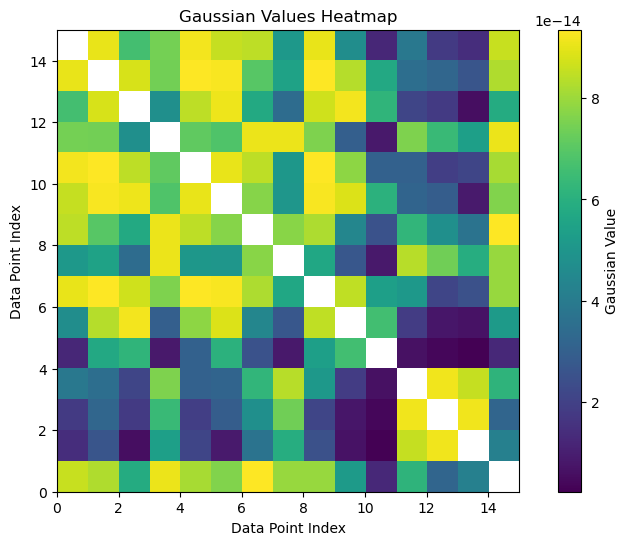

In [16]:
def gaussian_kernel(data1, data2):
    diff = data1 - data2
    norm_diff = np.linalg.norm(diff)
    sigma = np.std(diff)
    gaussian_value = np.exp(- (norm_diff ** 2) / (2 * sigma ** 2))
    return gaussian_value
data = np.array(data)
num_samples = 15
num_features = 60
gaussian_matrix = np.zeros((num_samples, num_samples))
for i in range(num_samples):
    for j in range(num_samples):
        gaussian_matrix[i, j] = gaussian_kernel(data[i], data[j])


plt.figure(figsize=(10, 6))
plt.imshow(gaussian_matrix, cmap='viridis', extent=[0, num_samples, 0, num_samples])
plt.colorbar(label='Gaussian Value')
plt.xlabel('Data Point Index')
plt.ylabel('Data Point Index')
plt.title('Gaussian Values Heatmap')
plt.show()



In [ ]:
distances_gaussian_kernal =pd.DataFrame(gaussian_matrix)
distances_gaussian_kernal.plot(kind='kde')
plt.show()

# Modified Blackman Window Law
The Blackman window is a type of Window Function used in signal processing and data analysis. Window functions are used to mitigate the side effects present in operations like Fourier transforms and digital filtering, where the difference between input and output values can impact the quality of results.

The Blackman window is named after mathematician and electrical engineer William Hamilton Blackman. This window is used to alleviate the sharp side lobes and behavior that occurs at the ends of a signal when applying transformation and filtering operations.
The Blackman window is represented by the following equation:

Where
 
The Blackman window contributes to reducing side lobes when applied to signals, making it suitable for improving accuracy in Fourier transforms and signal processing applications
Please note that this explanation provides a basic overview of the Blackman window. There are more details and use cases related to window functions in the field of signal processing and electrical engineering 

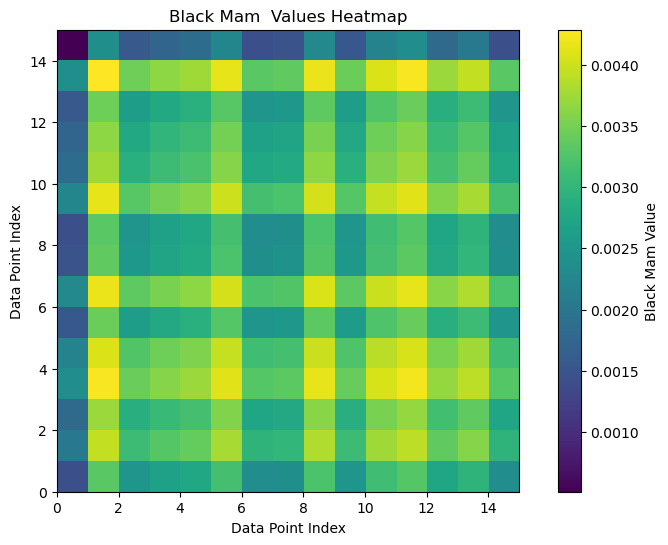

In [17]:
def blackman(arr1 ,arr2):
        mue1 = np.average(arr1)
        mue2 = np.average(arr2)
        sigma1 = np.sqrt(np.sum(np.square(arr1-mue1))/arr1.shape[0])
        sigma2 = np.sqrt(np.sum(np.square(arr2-mue2))/arr2.shape[0])
        sigma = np.sqrt(np.square(sigma1)+np.square(sigma2))
        black =  0.42+0.08*np.cos(4*np.pi*sigma/(arr1.shape[0]-1))-0.5*np.cos(2*np.pi*sigma/(arr1.shape[0]-1))
        return black
num_samples = 15
num_features = 60
blackMan_matrix = np.zeros((num_samples, num_samples))
for i in range(num_samples):
    for j in range(num_samples):
        blackMan_matrix[i, j] =blackman(data[i], data[j])

plt.figure(figsize=(10, 6))
plt.imshow(blackMan_matrix, cmap='viridis', extent=[0, num_samples, 0, num_samples])
plt.colorbar(label='Black Mam Value')
plt.xlabel('Data Point Index')
plt.ylabel('Data Point Index')
plt.title('Black Mam  Values Heatmap')
plt.show()



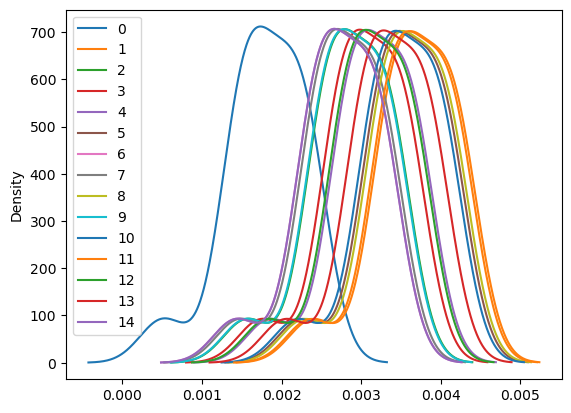

In [18]:
distances_blackMan_matrix =pd.DataFrame(blackMan_matrix)
distances_blackMan_matrix.plot(kind='kde')
plt.show()

#### Now, after analyzing the data, it became evident that the questions are not linearly correlated. Therefore, we proceed to employ non-linear classification algorithms.

#### First, we will split the dataset into 80% for training and 20% for testing.

In [19]:
X_train,X_test, y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
no_of_minority_classes_to_get = int(np.round(len(np.unique(y_train)) * 0.25))
percentage_to_remove = 80
for class_to_remove in range(no_of_minority_classes_to_get):
    indices_to_remove = np.unique(np.where(y_train == class_to_remove)[0])
    # Calculate the number of samples to remove
    num_samples_to_remove = int(percentage_to_remove / 100 * len(indices_to_remove))

    # Randomly select indices to remove
    indices_to_remove = np.random.choice(indices_to_remove, num_samples_to_remove, replace=False)
    # Remove the selected samples
    percentage_to_remove -= 10

    # Remove the selected samples
    X_train = np.delete(X_train, indices_to_remove, axis=0)
    y_train = np.delete(y_train, indices_to_remove, axis=0)
    percentage_to_remove -= 10

# K-means

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Confusion Matrix is : 
 [[178  27 144  14  70  68  36   6   9  52   7   2  71  29   0  60]
 [ 12  11 303   5  13  55   2   0   2  41   1   3   2 284   7   4]
 [  6  19  10   2  19 275  21   6   3   9   7  12   2 361   1  22]
 [  2   9   3   5  10   1   2   0   2 352   2   1   1 332   2   1]
 [  0   1   1   0 359   3   1   1 367   2   1   0   0   1   0   2]
 [  0   0   2   1 308   5  26   0   1   1   1   3   1   2   2 346]
 [  2   3   2 351   1   0   0   4   0   4   0   1   1   3 366   0]
 [  1 369   0   5   2   1 393   2   0   3   1   0   4   8   0   1]
 [  4   1   2 360   9 350   1   0   5   0   3   5   0   4   1   4]
 [368   0   6   1  31   3 326   0   1   3   0   0   3   0   1   1]
 [372   0   0   1   1   1   0   0   0   1   1   0   7 353   1   2]
 [  0   0 719   6   0   4   2   0   1   2   1   1   0   8   4   0]
 [  2   1   5   2   1 346   3   0   1 386   0   1   0   1   1   3]
 [  1 375   4   4   1 347   4   0   0   1   1   0   0   0   0   1]
 [  1   0   0   3   2   3   1 373   0 

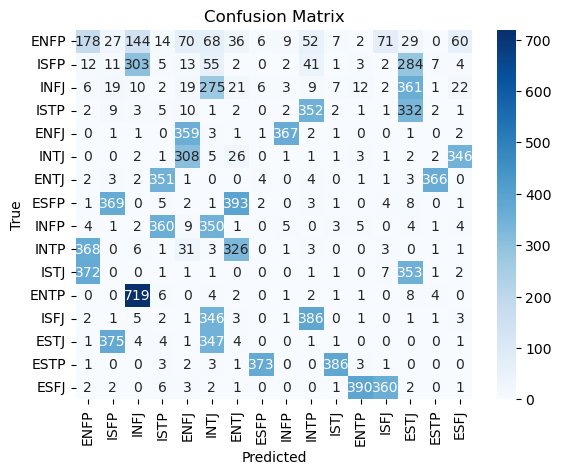

In [21]:
kmeans = KMeans(n_clusters=16, random_state=42)
kmeans.fit(X_train)

y_test_clusters = kmeans.predict(X_test)
accuracy = accuracy_score( y_test,y_test_clusters)
CM = confusion_matrix(y_test, y_test_clusters)
print('Confusion Matrix is : \n', CM)
print("Accuracy of K-means classification:", accuracy * 100, '%')
ClassificationReport = classification_report(y_test,y_test_clusters)
print('Classification Report is : ', ClassificationReport )

sns.heatmap(CM, annot=True, fmt="d", cmap="Blues", xticklabels=l, yticklabels=l)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

### The KMeans algorithm was tested, which is an unsupervised learning algorithm trained on X_train and used for predicting X_test, followed by comparing the results with y_test. The outcome was very poor.

## Now, we move on to supervised classification algorithms that are suitable for the dataset and aligned with the criteria we previously studied. These algorithms rely on supervised learning and will be applied to the dataset.

# 1- LDA (Linear Discriminant Analysis)

Confusion Matrix is : 
 [[657   4   5   1  16   7   7   5   3  17   1   6  13   5   8  18]
 [  9 614  26  19   0  12   7   1  17   4   2  16   4   3   2   9]
 [  0   5 674   5   2   5   2   8   2  12  18   3   3   7   4  25]
 [  1   4   1 659   5  12   3   4   7   1   7   2  13   0   2   4]
 [  5   1   2   1 680   7   2   1   5   6   1   1   6   2   7  12]
 [  1   3   0   3   8 639   1   3   2   5  10   2  10   1   2   9]
 [  1   1   1   1   3   0 702   2  13   2   4   3   1   1   1   2]
 [  0   1   0   6   1   3   2 751   3   7   1   0   3   4   5   3]
 [  0   0   2   4  17   4   8   1 673   0   9   1   7   8   5  10]
 [  2   0   3   2   0  20   0   5   4 682  11   6   2   0   1   6]
 [  0   0   3  25   2   6   4   1   5  19 661   0  12   1   1   0]
 [  0   5   1   2   2   1   7   1   2   3   3 707   3   5   2   4]
 [  3   7   5  23   3  10   3   2  10   3   7   4 651  14   4   4]
 [  4   0   4   0   1   1   1   5   9   7   1   0  11 692   1   2]
 [  1   0   0   1   4   9   2   5   4 

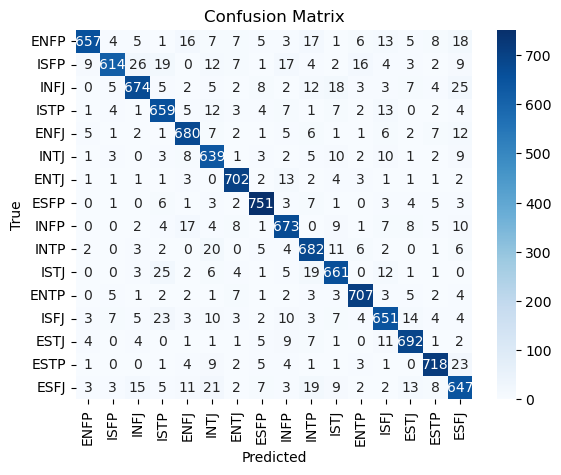

In [23]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
y_pred = lda.predict(X_test)
accuracy = accuracy_score( y_test,y_pred)
CM = confusion_matrix(y_test, y_pred)
print('Confusion Matrix is : \n', CM)
print("Accuracy : ", accuracy * 100, '%')
ClassificationReport = classification_report(y_test,y_pred)
print('Classification Report is : ', ClassificationReport )

sns.heatmap(CM, annot=True, fmt="d", cmap="Blues", xticklabels=l, yticklabels=l)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


# 2- RandomForest 

Confusion Matrix is : 
 [[627   2   4   3  13   9  12  17   3  30   5  17   9  11   6   5]
 [  2 667  10   7   2   3  10   1   9   3   3  16   5   2   3   2]
 [  0   2 726   2   2   1   5   4   0   8  10   4   2   4   3   2]
 [  0   0   0 711   1   1   2   0   0   0   4   0   3   0   2   1]
 [  0   1   1   1 726   2   1   0   1   0   0   1   0   1   3   1]
 [  1   3   0   0   1 686   1   0   1   0   1   1   3   0   0   1]
 [  1   0   0   0   1   0 726   0   1   1   2   1   1   2   0   2]
 [  0   1   0   2   1   2   1 774   3   3   1   0   0   1   1   0]
 [  0   0   0   1   6   0   4   0 725   1   3   0   0   3   2   4]
 [  1   0   1   1   4   2   0   1   0 727   2   4   0   0   1   0]
 [  0   0   0   2   1   0   2   0   1   3 728   2   0   0   0   1]
 [  0   1   0   1   0   0   3   1   1   0   2 736   2   0   1   0]
 [  0   0   2   1   1   3   3   1   6   1   1   1 728   5   0   0]
 [  2   0   1   0   1   0   0   1   2   1   0   1   3 725   2   0]
 [  0   0   1   0   0   2   3   1   0 

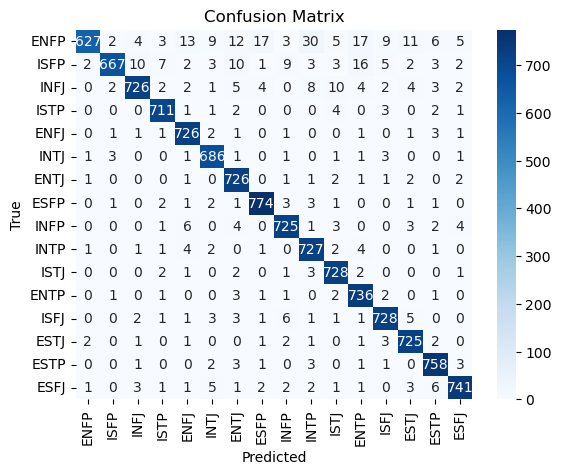

In [24]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)

rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)


accuracy = accuracy_score( y_test,y_pred)

CM = confusion_matrix(y_test, y_pred)

print('Confusion Matrix is : \n', CM)
print("Accuracy : ", accuracy * 100, '%')

ClassificationReport = classification_report(y_test,y_pred)

print('Classification Report is : ', ClassificationReport )


sns.heatmap(CM, annot=True, fmt="d", cmap="Blues", xticklabels=l, yticklabels=l)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


# 3- SVM (Support Vector Machine) 

Confusion Matrix is : 
 [[763   0   2   0   1   1   0   0   1   2   0   1   0   1   0   1]
 [  2 734   0   2   0   2   0   0   1   1   0   0   0   1   1   1]
 [  0   0 761   0   1   0   2   1   0   5   1   1   2   0   1   0]
 [  0   0   0 718   0   0   2   0   0   0   2   0   1   0   1   1]
 [  0   1   1   1 731   1   0   1   0   0   0   0   0   1   2   0]
 [  1   2   0   0   1 693   1   0   1   0   0   0   0   0   0   0]
 [  1   0   0   0   0   0 729   0   1   1   1   2   1   0   0   2]
 [  0   1   0   0   1   2   1 777   1   3   1   0   1   0   1   1]
 [  0   0   0   1   1   0   1   0 740   0   2   0   0   0   1   3]
 [  1   0   1   0   0   0   0   0   0 740   1   1   0   0   0   0]
 [  0   0   0   1   0   1   1   0   1   0 736   0   0   0   0   0]
 [  0   2   0   1   0   0   2   1   1   0   2 737   1   0   1   0]
 [  0   0   1   0   1   1   2   0   1   1   1   1 743   1   0   0]
 [  2   0   0   0   0   0   0   0   1   1   0   0   0 733   2   0]
 [  1   0   0   0   0   1   0   0   2 

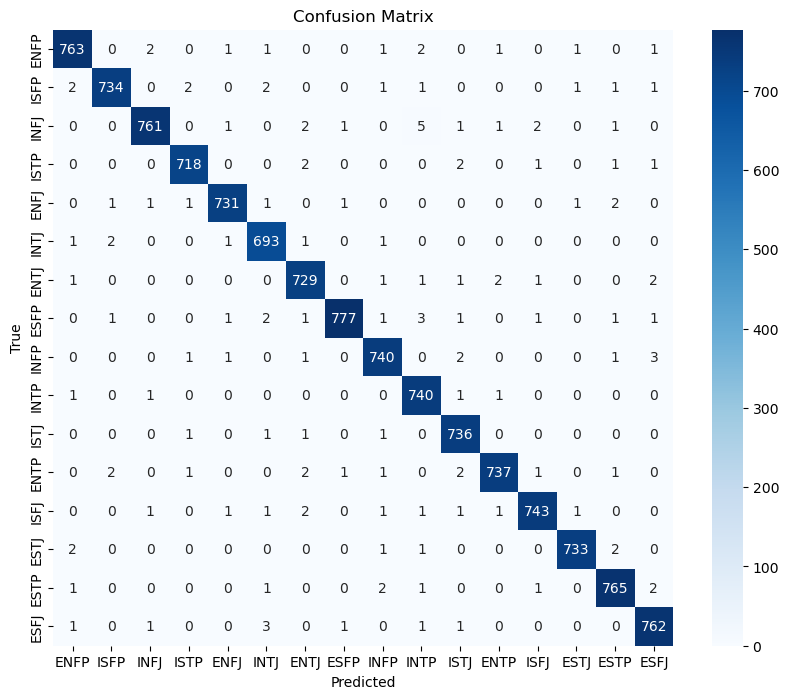

In [25]:
svm = SVC(kernel='rbf')
svm.fit(X_train ,y_train)
y_pred = svm.predict(X_test)
accuracy = accuracy_score( y_test,y_pred)
CM = confusion_matrix(y_test, y_pred)
print('Confusion Matrix is : \n', CM)
print("Accuracy : ", accuracy * 100, '%')
ClassificationReport = classification_report(y_test,y_pred)
print('Classification Report is : ', ClassificationReport )
plt.figure(figsize=(10, 8))
sns.heatmap(CM, annot=True, fmt="d", cmap="Blues", xticklabels=l, yticklabels=l)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


# 4-K-Nearest Neighbors (KNN)

Confusion Matrix is : 
 [[759   1   2   0   1   0   1   0   1   2   0   3   1   2   0   0]
 [  2 736   0   1   0   1   0   0   2   1   0   0   0   0   1   1]
 [  0   0 763   0   1   0   2   1   0   4   0   1   2   0   1   0]
 [  0   0   0 718   0   0   2   0   0   0   2   0   1   0   1   1]
 [  0   1   1   1 733   1   0   1   0   0   0   0   0   0   1   0]
 [  1   2   0   0   1 693   1   0   1   0   0   0   0   0   0   0]
 [  1   0   0   0   0   0 731   0   0   1   1   1   1   0   0   2]
 [  0   1   0   0   1   2   1 777   1   3   1   0   0   0   1   2]
 [  0   0   0   1   1   0   1   0 741   0   2   0   0   0   1   2]
 [  1   0   1   0   0   0   0   0   0 740   1   1   0   0   0   0]
 [  0   0   0   1   0   1   1   0   1   1 735   0   0   0   0   0]
 [  0   1   0   1   0   0   1   1   1   0   2 739   1   0   1   0]
 [  0   0   1   0   1   1   2   0   1   1   1   1 743   1   0   0]
 [  2   0   0   0   0   0   0   0   1   1   0   0   0 734   1   0]
 [  1   0   0   0   0   1   0   0   1 

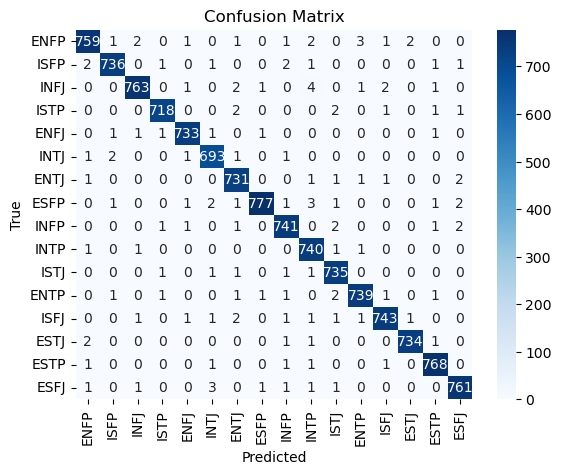

In [26]:
knn = KNeighborsClassifier(n_neighbors=10)

knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

accuracy = accuracy_score( y_test,y_pred)
CM = confusion_matrix(y_test, y_pred)
ClassificationReport = classification_report(y_test,y_pred)

print('Confusion Matrix is : \n', CM)
print("Accuracy : ", accuracy * 100, '%')
print('Classification Report is : ', ClassificationReport )

sns.heatmap(CM, annot=True, fmt="d", cmap="Blues", xticklabels=l, yticklabels=l)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


#### Now, we transition to deep learning techniques, advanced neural networks."

Epoch 1/25


/opt/conda/lib/python3.10/site-packages/keras/backend.py:5612: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1166/1166 [==============================] - 3s 2ms/step - loss: 1.0975 - accuracy: 0.6996 - val_loss: 0.4585 - val_accuracy: 0.8897
Epoch 2/25
1166/1166 [==============================] - 2s 2ms/step - loss: 0.3829 - accuracy: 0.9076 - val_loss: 0.3551 - val_accuracy: 0.9129
Epoch 3/25
1166/1166 [==============================] - 2s 2ms/step - loss: 0.3318 - accuracy: 0.9169 - val_loss: 0.3329 - val_accuracy: 0.9169
Epoch 4/25
1166/1166 [==============================] - 2s 2ms/step - loss: 0.3170 - accuracy: 0.9196 - val_loss: 0.3279 - val_accuracy: 0.9201
Epoch 5/25
1166/1166 [==============================] - 2s 2ms/step - loss: 0.3115 - accuracy: 0.9208 - val_loss: 0.3260 - val_accuracy: 0.9167
Epoch 6/25
1166/1166 [==============================] - 2s 2ms/step - loss: 0.3085 - accuracy: 0.9218 - val_loss: 0.3266 - val_accuracy: 0.9203
Epoch 7/25
1166/1166 [==============================] - 2s 2ms/step - loss: 0.3074 - accuracy: 0.9218 - val_loss: 0.3258 - val_accuracy: 0.9201
Epo

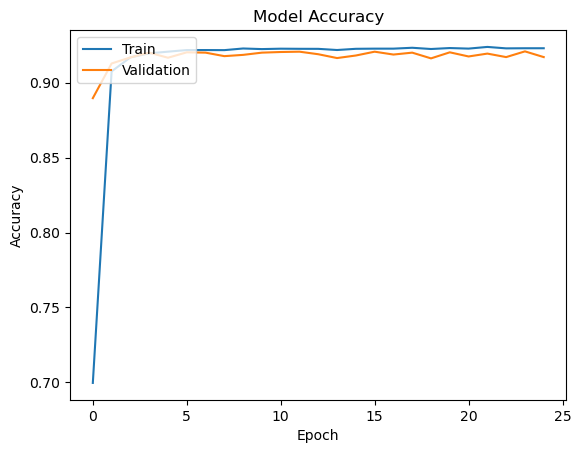

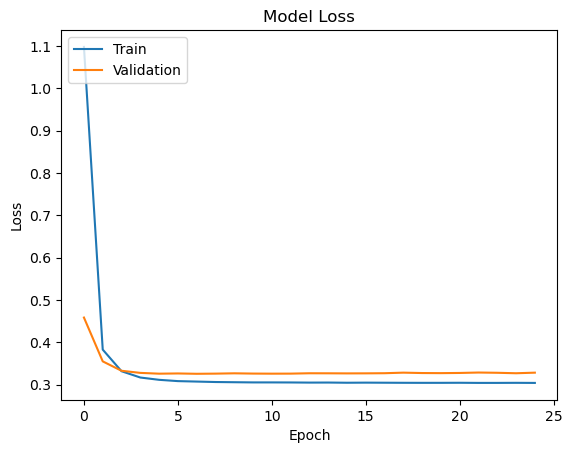

375/375 [==============================] - 0s 1ms/step


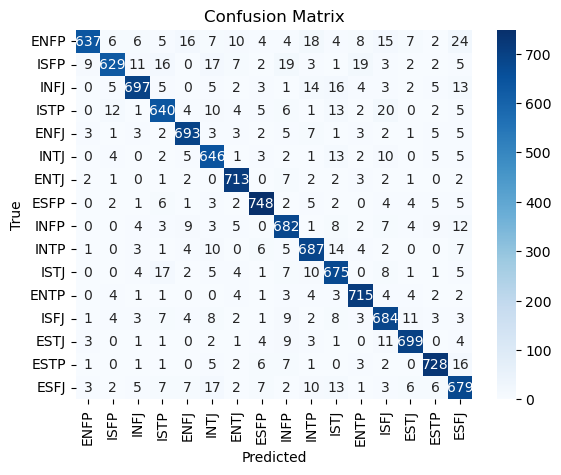

In [27]:
input_shape = (X_train.shape[1],)
Input = Input(shape=input_shape)
output = Dense(16, activation="softmax")(Input)
model = Model(Input, output)

model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(lr=0.01),
    metrics=['accuracy']
)

info = model.fit(X_train,y_train, epochs=25, validation_split=0.112, batch_size=32)

test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2, batch_size=40)

print('Test accuracy:', test_acc)

plt.plot(info.history['accuracy'])
plt.plot(info.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(info.history['loss'])
plt.plot(info.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)


conf_matrix = metrics.confusion_matrix(y_test, y_pred_classes)
# plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=l, yticklabels=l)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


# "Now, we start using ANN (Artificial Neural Network) with an output layer and two hidden layers."

Epoch 1/25


/opt/conda/lib/python3.10/site-packages/keras/backend.py:5612: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1166/1166 [==============================] - 3s 2ms/step - loss: 0.4476 - accuracy: 0.8788 - val_loss: 0.3753 - val_accuracy: 0.9016
Epoch 2/25
1166/1166 [==============================] - 2s 2ms/step - loss: 0.3577 - accuracy: 0.9038 - val_loss: 0.3667 - val_accuracy: 0.9035
Epoch 3/25
1166/1166 [==============================] - 3s 2ms/step - loss: 0.3499 - accuracy: 0.9066 - val_loss: 0.3642 - val_accuracy: 0.9057
Epoch 4/25
1166/1166 [==============================] - 2s 2ms/step - loss: 0.3475 - accuracy: 0.9080 - val_loss: 0.3635 - val_accuracy: 0.9065
Epoch 5/25
1166/1166 [==============================] - 2s 2ms/step - loss: 0.3476 - accuracy: 0.9071 - val_loss: 0.3574 - val_accuracy: 0.9067
Epoch 6/25
1166/1166 [==============================] - 2s 2ms/step - loss: 0.3465 - accuracy: 0.9082 - val_loss: 0.3592 - val_accuracy: 0.9086
Epoch 7/25
1166/1166 [==============================] - 2s 2ms/step - loss: 0.3440 - accuracy: 0.9096 - val_loss: 0.3580 - val_accuracy: 0.9108
Epo

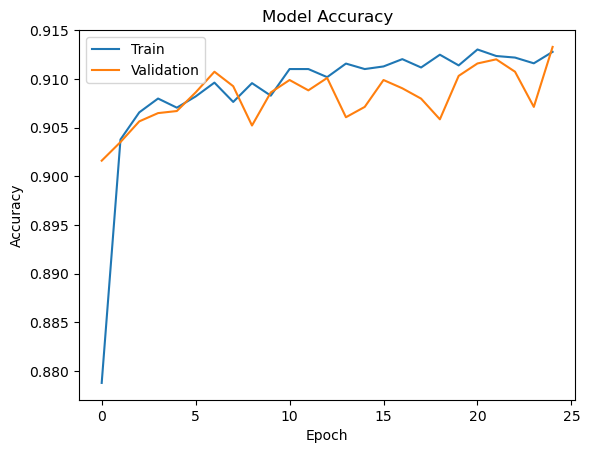

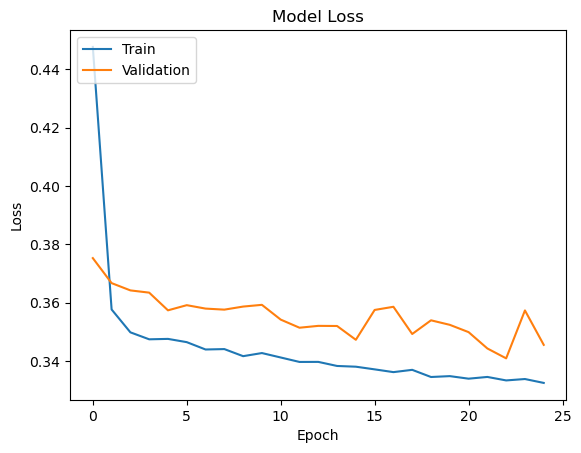

375/375 [==============================] - 0s 1ms/step


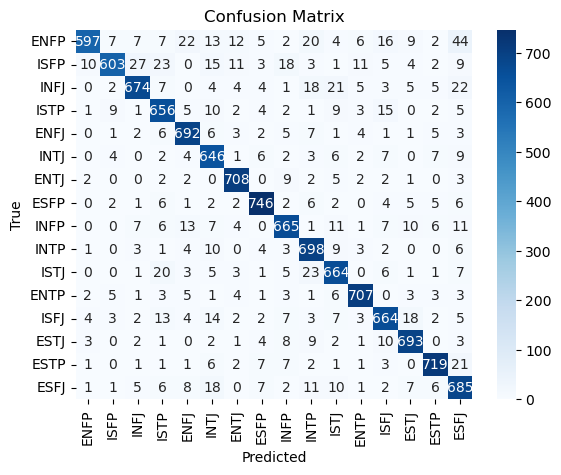

In [28]:
import tensorflow as tf
from tensorflow.keras.models import Sequential

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Input, LSTM, Dense
from tensorflow.keras.models import Model

input_shape = (X_train.shape[1],)
Input = Input(shape=input_shape)
x =Dense(128)(Input)
x =Dense(64)(x)
output = Dense(16, activation="softmax")(x)
model = Model(Input, output)

model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(lr=0.01),
    metrics=['accuracy']
)

info = model.fit(X_train,y_train, epochs=25, validation_split=0.112, batch_size=32)

test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2, batch_size=40)

print('Test accuracy:', test_acc)

plt.plot(info.history['accuracy'])
plt.plot(info.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(info.history['loss'])
plt.plot(info.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)


conf_matrix = metrics.confusion_matrix(y_test, y_pred_classes)
# plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=l, yticklabels=l)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


In [32]:
from sklearn import metrics

f1_all_cls = metrics.f1_score(y_test, y_pred_classes, average=None)
f1_macro_avg = metrics.f1_score(y_test, y_pred_classes, average='weighted')
for i, f1 in enumerate(f1_all_cls):
    print("class {} : {:.3f}".format(i, f1), end=", ")
print("weighted macro avg : {:.3f}".format(f1_macro_avg))

class 0 : 0.856, class 1 : 0.873, class 2 : 0.893, class 3 : 0.884, class 4 : 0.921, class 5 : 0.886, class 6 : 0.946, class 7 : 0.941, class 8 : 0.893, class 9 : 0.899, class 10 : 0.886, class 11 : 0.944, class 12 : 0.885, class 13 : 0.926, class 14 : 0.935, class 15 : 0.850, weighted macro avg : 0.901


# LSTM
Now, we employ an LSTM network.

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Input, LSTM, Dense
from tensorflow.keras.models import Model


input_shape = (X_train.shape[1],1)
Input = Input(shape=input_shape )
x = LSTM(64)(Input)
x = Dense(32)(x)
output = Dense(16, activation="softmax")(x)
model = Model(Input, output)

model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(lr=0.01),
    metrics=['accuracy']
)

info = model.fit(X_train,y_train, epochs=25, validation_split=0.25, batch_size=32)

test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2, batch_size=40)

print('Test accuracy:', test_acc)

plt.plot(info.history['accuracy'])
plt.plot(info.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(info.history['loss'])
plt.plot(info.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)


conf_matrix = metrics.confusion_matrix(y_test, y_pred_classes)
# plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=l, yticklabels=l)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


# Does the dataset form a pattern or not?
**Now, we take samples of various sizes from the dataset and verify whether they form a recognizable pattern. If they do form a pattern, we utilize advanced pre-trained networks like VGG. If not, we construct a suitable CNN network**

**First, we adjust the dataset range from {3- ,3} to{ 0, 255}**

In [ ]:
arr = df.iloc[1000:1100,0 :-1].values
arr_interp3 = np.interp(arr, (-3, 3), (0, 255)).astype(np.uint8)
plt.imshow(arr_interp3, cmap='gray')
plt.show()

# CNN
### Now, we utilize a CNN network with a specific architecture

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Input, LSTM, Dense
from tensorflow.keras.models import Model

input_shape = (X_train.shape[1],1)
Input = tf.keras.layers.Input(shape=input_shape)
x = tf.keras.layers.Conv1D(filters=16,kernel_size=4,strides=1,activation="relu",padding="valid")(Input)
x = tf.keras.layers.Conv1D(filters=16,kernel_size=4,strides=1,activation="relu",padding="valid")(x)
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(256,activation="relu")(x)
x = tf.keras.layers.Dropout(0.5)(x)
x = tf.keras.layers.Dense(128,activation="relu")(x)
x = tf.keras.layers.Dropout(0.4)(x)
x = tf.keras.layers.Dense(64,activation="relu")(x)
x = tf.keras.layers.Dense(32,activation="relu")(x)
output = tf.keras.layers.Dense(16,activation="softmax")(x)
model = tf.keras.Model(Input,output)

model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(lr=0.01),
    metrics=['accuracy']
)

info = model.fit(X_train,y_train, epochs=30, validation_split=0.25, batch_size=32)

test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2, batch_size=40)

print('Test accuracy:', test_acc)

plt.plot(info.history['accuracy'])
plt.plot(info.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(info.history['loss'])
plt.plot(info.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)


conf_matrix = metrics.confusion_matrix(y_test, y_pred_classes)
# plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=l, yticklabels=l)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


# LSTM+CNN

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Input, LSTM, Dense
from tensorflow.keras.models import Model


input_shape = (X_train.shape[1],1)
Input = Input(shape=input_shape )
x = tf.keras.layers.Conv1D(filters=128,kernel_size=3,strides=1,activation="relu",padding="valid")(Input)
x = tf.keras.layers.Conv1D(filters=128,kernel_size=3,strides=1,activation="relu",padding="valid")(x)
#x = tf.keras.layers.Flatten()(x)
x = LSTM(60)(x)
x = Dense(32)(x)
output = Dense(16, activation="softmax")(x)
model = Model(Input, output)


model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(lr=0.01),
    metrics=['accuracy']
)

info = model.fit(X_train,y_train, epochs=15, validation_split=0.25, batch_size=32)

test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2, batch_size=40)

print('Test accuracy:', test_acc)

plt.plot(info.history['accuracy'])
plt.plot(info.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(info.history['loss'])
plt.plot(info.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)


conf_matrix = metrics.confusion_matrix(y_test, y_pred_classes)
# plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=l, yticklabels=l)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()
